## Task 3
In this third task of the assignment we the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Our goal in this task is to train a convolutional neural network that is able to classify if an image is of a specific category or not, aswell as adding new images and being able to classify those images.

## Step 1
Import necessary libraries: The first step is to import the required libraries. In this code, we are using TensorFlow and Keras for building and training the neural network, matplotlib for plotting the training history, NumPy for data manipulation, and scikit-learn for splitting the data into training, validation, and testing sets and calculating the confusion matrix.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image

import warnings


## Step 2
Load the CIFAR-10 dataset: The CIFAR-10 dataset is a collection of 60,000 32x32 color images in 10 classes, with 6,000 images per class. In this code, we load the dataset using the keras.datasets.cifar10.load_data() function and split it into training and testing sets.

In [2]:
#Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

## Step 3
Define the class names: We define the class names for the CIFAR-10 dataset. There are 10 classes in the dataset, each corresponding to a different object. Aswell as testing the dataset by showing a visual for images and their associated category.

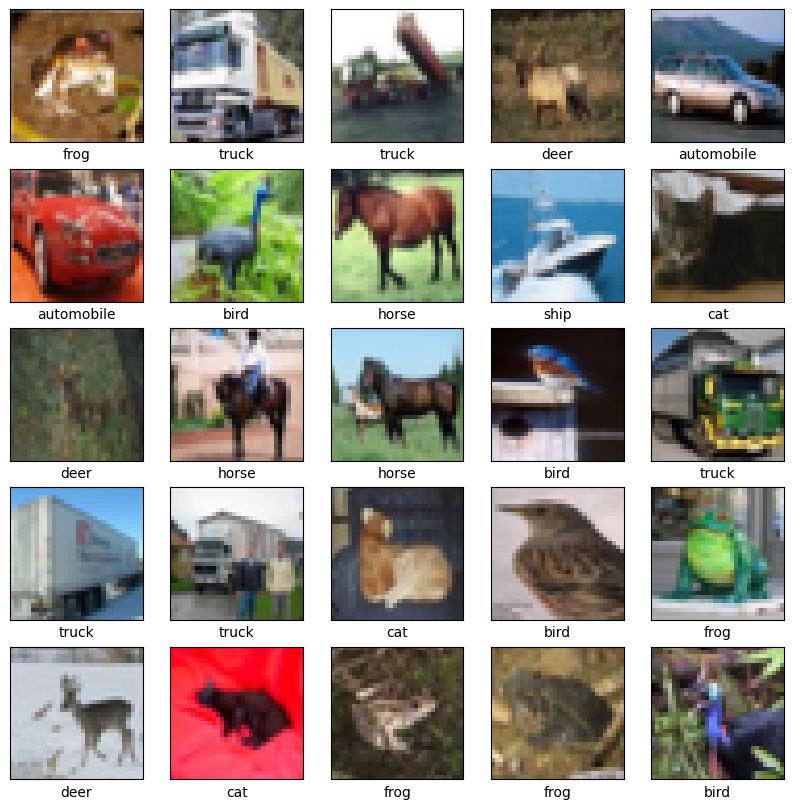

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

We got this code from "https://www.tensorflow.org/tutorials/images/cnn"

## Step 4
Creating a Binary Classification Dataset: In this step, a binary classification dataset is created by selecting a specific category to classify and converting all other labels to 0. This is done by setting the value of 'category_to_classify' to the desired class label, which in this case is 0, corresponding to the "airplane" class. Then, the 'train_labels' and 'test_labels' are converted to binary labels by setting the label values of the selected category to 1 and all other labels to 0.

In [4]:
category_to_classify = 0
train_labels = (train_labels == category_to_classify).astype(int)
test_labels = (test_labels == category_to_classify).astype(int)

## Step 5
Splitting the Dataset into Training, Validation, and Test Sets: The training dataset is further split into training and validation sets using the 'train_test_split' function from the 'sklearn.model_selection' library. 20% of the training data is set aside as validation data, and the remaining 80% is used for training. The test set remains unchanged.



In [5]:

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

## Step 6
Preprocessing the Images: In this step, the pixel values of the images are normalized to values between 0 and 1 by dividing them by 255.0. This is important because it makes the training process more efficient and accurate.

In [6]:
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

## Step 7
Creating a Basic Convolutional Neural Network: This step defines a basic convolutional neural network (CNN) using the Keras Sequential API. It consists of three convolutional layers, each followed by a max-pooling layer, a flatten layer, and two dense layers. The first dense layer uses a ReLU activation function, while the final layer uses a sigmoid activation function since it is a binary classification problem.

In [7]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

This code was inspired from the website https://www.tensorflow.org/tutorials/images/cnn

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Step 8
Compiling the Model: The model is compiled using the 'compile' method, which specifies the optimizer, loss function, and evaluation metrics to be used during training.

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

## Step 9
Training the Model: The model is trained using the 'fit' method, which trains the model on the training data and validates it on the validation data. The number of epochs, or iterations over the entire dataset, is set to 10 in this case.

Evaluating the Model: After training, the model is evaluated on the test set using the 'evaluate' method. The accuracy of the model on the test set is printed to the console.

Saving the Model: Finally, the trained model is saved to disk in HDF5 format using the 'save' method.

In [10]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))
loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', acc)
model.save('my_model.h5')

Epoch 1/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.2409 - acc: 0.9119 - val_loss: 0.1967 - val_acc: 0.9273
Epoch 2/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.1950 - acc: 0.9273 - val_loss: 0.1772 - val_acc: 0.9331
Epoch 3/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.1720 - acc: 0.9359 - val_loss: 0.1623 - val_acc: 0.9394
Epoch 4/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.1561 - acc: 0.9414 - val_loss: 0.1619 - val_acc: 0.9387
Epoch 5/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.1409 - acc: 0.9471 - val_loss: 0.1595 - val_acc: 0.9401
Epoch 6/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.1266 - acc: 0.9524 - val_loss: 0.1513 - val_acc: 0.9425
Epoch 7/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1150 - acc: 0.9571 - val_loss: 0.1533 - val_acc: 0.9456
Epoch 8/10
1250/1250 [==========================

## Step 10
Plotting the Training and Validation Loss and Accuracy: The training and validation loss and accuracy metrics are plotted using the matplotlib.pyplot library to visualize the training process and determine if the model is overfitting or underfitting

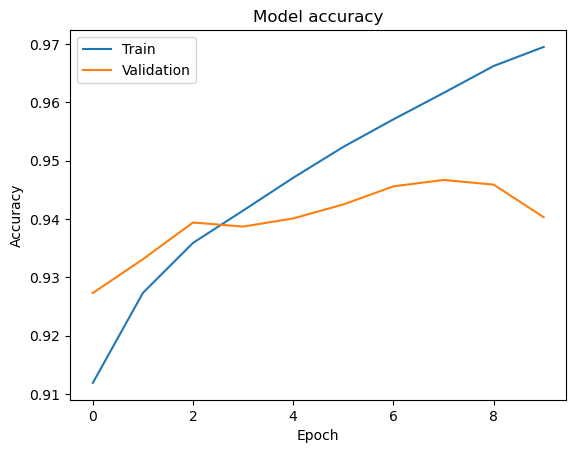

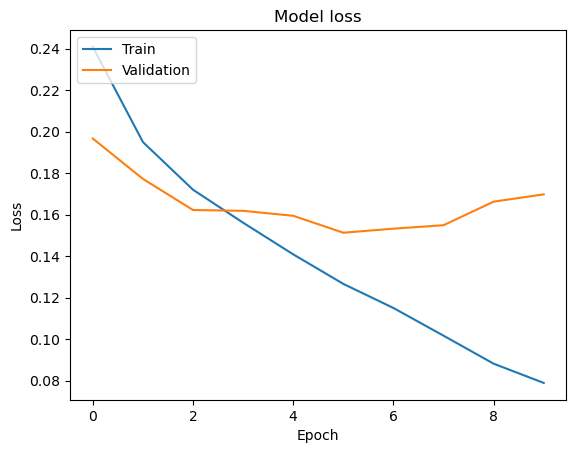

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



## Step 11
Compute the confusion matrix using scikit-learn's confusion_matrix() function, which takes the true labels and predicted labels as inputs.

Plot the confusion matrix as a heatmap using Matplotlib and Seaborn libraries. The heatmap shows the number of true positive, false positive, false negative, and true negative predictions for each class. And then showing the plot.

313/313 [==============================] - 1s 3ms/step


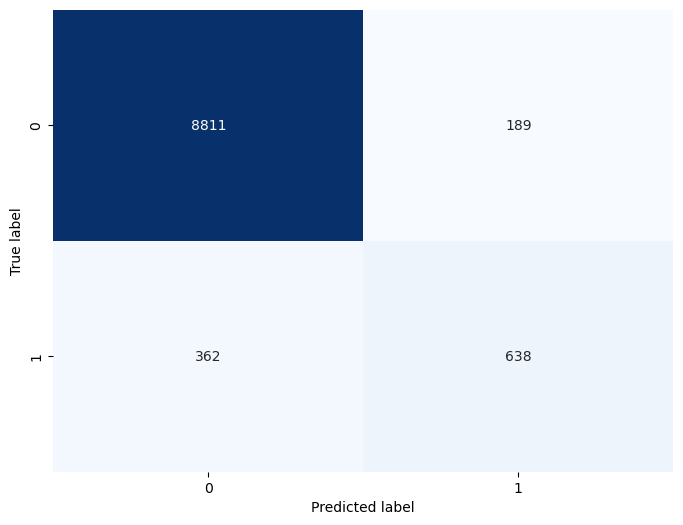

In [12]:
predictions = model.predict(test_images)
predictions = np.round(predictions)
cm = confusion_matrix(test_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Step 12 
Here we show the different pictures we will use to demonstrate how our model would classify it. We chose to take existing photos and will include them in our zip file. We have three photos of a dog, car and plane

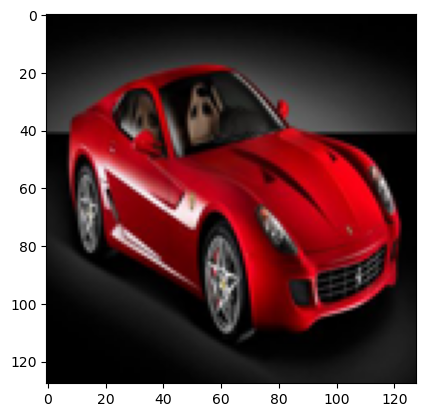

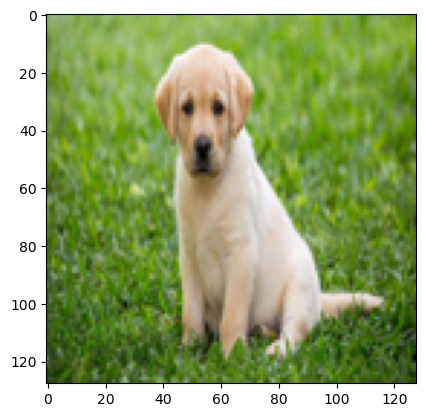

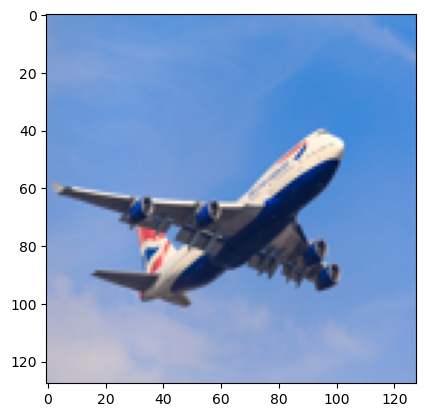

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

def pictures(image_paths):

    for path in image_paths:
        image = Image.open(path)

        size = (128, 128)
        resized_image = image.resize(size)

        plt.imshow(resized_image)
        plt.show()
    
pictures(['Data/ferrari.jpg', 'Data/Dog.jpg', 'Data/plane.jpg'])

## Step 13
The predict_image function takes the list of image file paths that was shown earlier. 
For each image, it loads a saved Keras model from a file called my_model.h5. 
Then, the image is loaded from the file path using the Pillow library and resized to 32 x 32 pixels to be compatible with the CIFAR-10 dataset.

Next, the image is converted to a NumPy array and normalized by dividing each pixel value by 255.0 to scale the pixel values to the range [0, 1]. 
A batch dimension is added to the array, which makes the shape of the array (1, 32, 32, 3).

The model is then used to predict the probability of the input image belonging to the chosen category. The predicted probability is rounded to the nearest integer to get the predicted label, either 1 for a plane or 0 for not a plane.

We then run the test on the said pictures


In [14]:
warnings.filterwarnings("ignore", message="Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions.")

Ignore the warning, as it does not affect the correctness of the code. 
This warning indicating that TensorFlow is still tracing and executing tf.data functions as graphs, 
even though eager execution is enabled. This should not cause an issue 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
1/1 [==============================] - 0s 43ms/step


B:\anaconda3\envs\EpicML\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


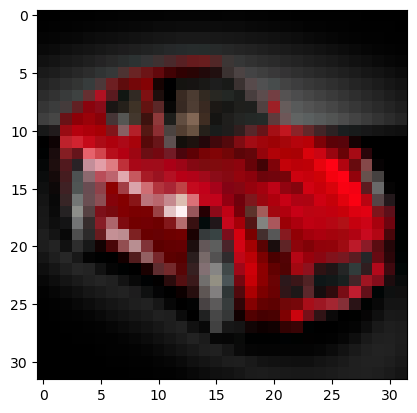

Predicting if plane = 1 not plane = 0 Data/ferrari.jpg: 0
1/1 [==============================] - 0s 20ms/step


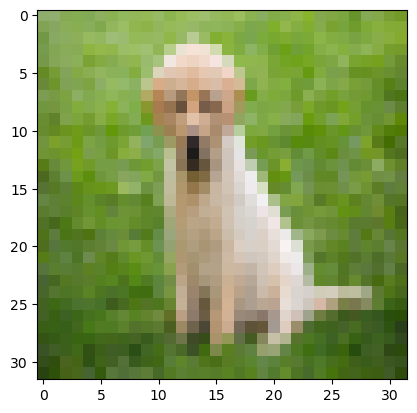

Predicting if plane = 1 not plane = 0 Data/Dog.jpg: 0
1/1 [==============================] - 0s 20ms/step


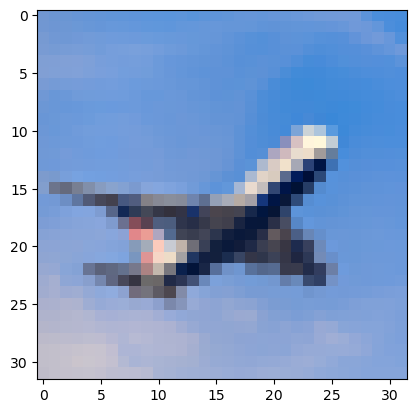

Predicting if plane = 1 not plane = 0 Data/plane.jpg: 1


In [15]:
tf.config.experimental_run_functions_eagerly(True)

def predict_image(image_paths):
    model = keras.models.load_model('my_model.h5')

    for path in image_paths:
        image = Image.open(path)

        size = (32, 32)
        resized_image = image.resize(size)

        image_array = np.asarray(resized_image)
        
        image_array = image_array.astype('float32') / 255.0

        image_array = np.expand_dims(image_array, axis=0)

        prediction = model.predict(image_array)

        predicted_label = int(round(prediction[0][0]))

        plt.imshow(resized_image)
        plt.show()

        print(f"Predicting if plane = 1 not plane = 0 {path}: {predicted_label}")
    
predict_image(['Data/ferrari.jpg', 'Data/Dog.jpg', 'Data/plane.jpg'])

## Conclusion

After making the predictions using the model, the predicted labels are displayed along with the corresponding input images. The predictions are correct, and the function can be considered successful in classifying the input images. Overall, this function demonstrates how pre-trained models can be used to classify images